In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\raw\rawData12_24Complete.csv')
mainDF

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,AwayTeamScoreFT,AwayTeamScore,homePosition,homePoints,homePercentage,awayPosition,awayPoints,awayPercentage,Home Odds,Away Odds
0,2012R0101,2012,1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,"38,203",...,14.16,100,18.0,0.0,37.0,1.0,4.0,270.3,13.78,1.02
1,2012R0102,2012,1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,"78,285",...,18.17,125,15.0,0.0,64.8,4.0,4.0,154.3,2.48,1.52
2,2012R0103,2012,1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,"78,466",...,16.19,115,6.0,4.0,119.1,13.0,0.0,83.9,1.65,2.19
3,2012R0104,2012,1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,"33,473",...,17.17,119,14.0,0.0,65.5,5.0,4.0,152.6,1.42,2.81
4,2012R0105,2012,1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,"12,790",...,19.23,137,17.0,0.0,49.6,2.0,4.0,201.5,4.39,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2023SF01,2023,-3,2023-09-15,24.5,14.4,0.0,M.C.G.,7:50 PM,"96,412",...,11.70,73,NaN,NaN,NaN,NaN,NaN,NaN,1.61,2.21
2444,2023SF02,2023,-3,2023-09-16,24.0,7.6,0.0,Adelaide Oval,7:10 PM,"45,520",...,13.15,93,NaN,NaN,NaN,NaN,NaN,NaN,1.62,2.18
2445,2023PF01,2023,-2,2023-09-22,15.3,5.7,0.0,M.C.G.,7:50 PM,"97,665",...,8.90,57,NaN,NaN,NaN,NaN,NaN,NaN,1.55,2.34
2446,2023PF02,2023,-2,2023-09-23,24.1,14.2,0.0,Gabba,5:15 PM,"36,012",...,9.90,63,NaN,NaN,NaN,NaN,NaN,NaN,1.38,3.05


C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\1671182766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')


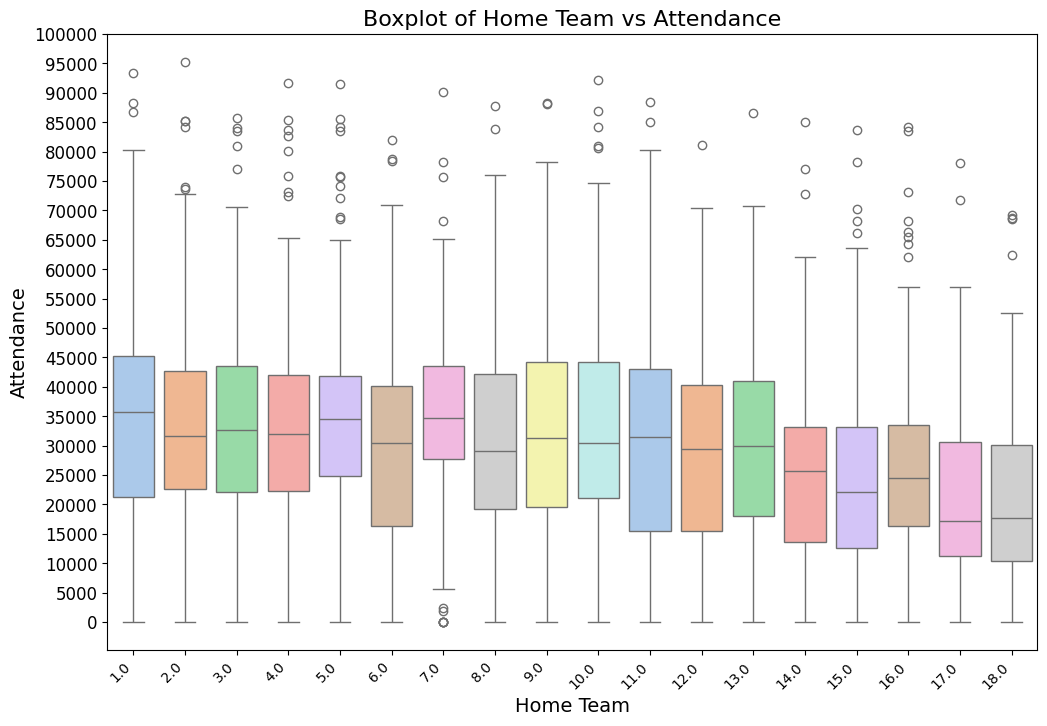

In [8]:

mainDF['Attendance'] = mainDF['Attendance'].str.replace(',', '', regex=True)  # Remove commas
mainDF['Attendance'] = pd.to_numeric(mainDF['Attendance'], errors='coerce') 

# Boxplot of Home Team vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Home Team vs Attendance', fontsize=16)
plt.xlabel('Home Team', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\2589849868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')


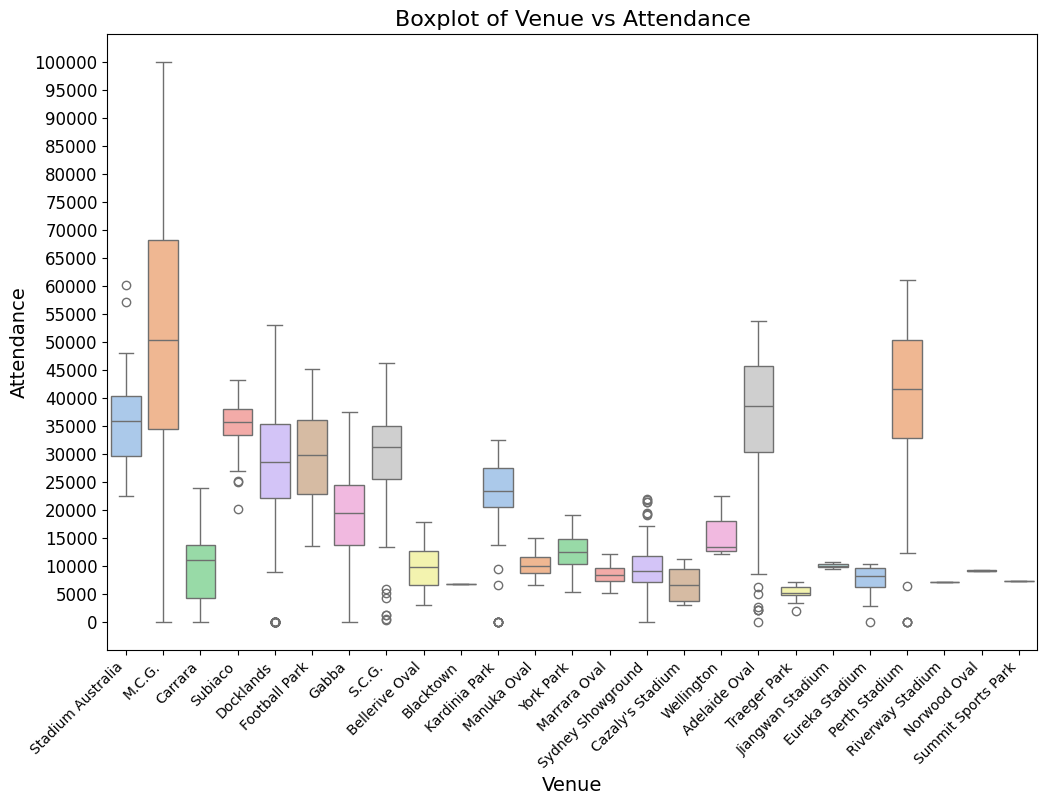

Venue
Adelaide Oval         36695.590517
Bellerive Oval         9736.611111
Blacktown              6875.000000
Carrara                9857.433121
Cazaly's Stadium       6834.923077
Docklands             28193.667319
Eureka Stadium         7329.500000
Football Park         29707.347826
Gabba                 18681.037037
Jiangwan Stadium      10073.000000
Kardinia Park         22286.736842
M.C.G.                51226.575000
Manuka Oval           10351.818182
Marrara Oval           8459.750000
Norwood Oval           9193.000000
Perth Stadium         39923.985185
Riverway Stadium       7243.000000
S.C.G.                29310.958333
Stadium Australia     36515.631579
Subiaco               35468.571429
Summit Sports Park     7329.000000
Sydney Showground      9700.430108
Traeger Park           5170.444444
Wellington            16026.666667
York Park             12648.750000
Name: Attendance, dtype: float64
Venue
M.C.G.                560
Docklands             511
Adelaide Oval         232
Ga

In [9]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Venue vs Attendance', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()
mean_attendance_per_venue = mainDF.groupby('Venue')['Attendance'].mean()
print(mean_attendance_per_venue)

venue_count = mainDF['Venue'].value_counts()
print(venue_count)

## Attendance

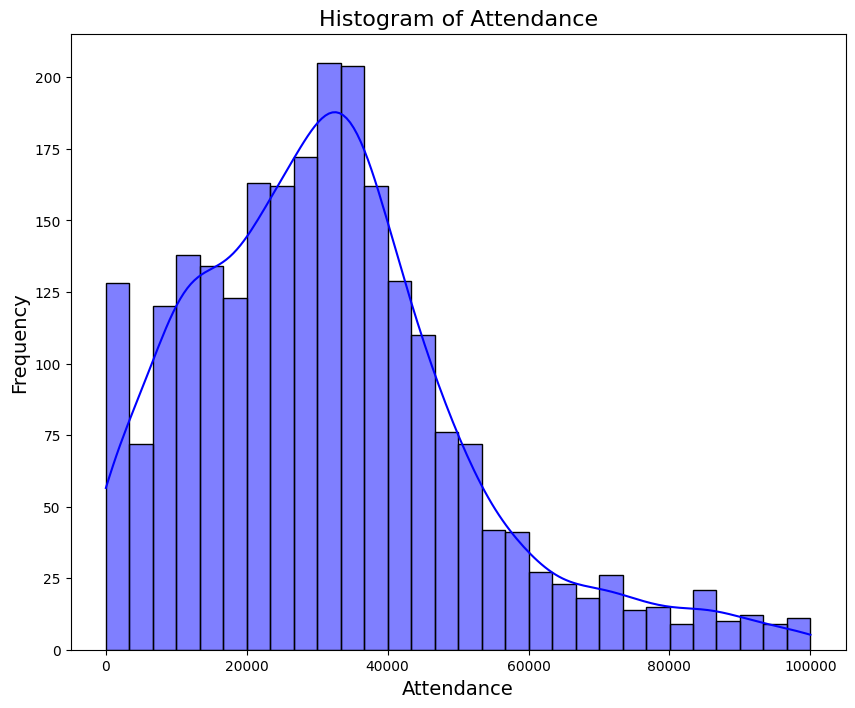

In [10]:
plt.figure(figsize=(10, 8))
sns.histplot(mainDF['Attendance'], bins=30, kde=True, color='blue')

plt.title('Histogram of Attendance', fontsize=16)
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\496554238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Year'], y=mainDF['Attendance'], palette='pastel')


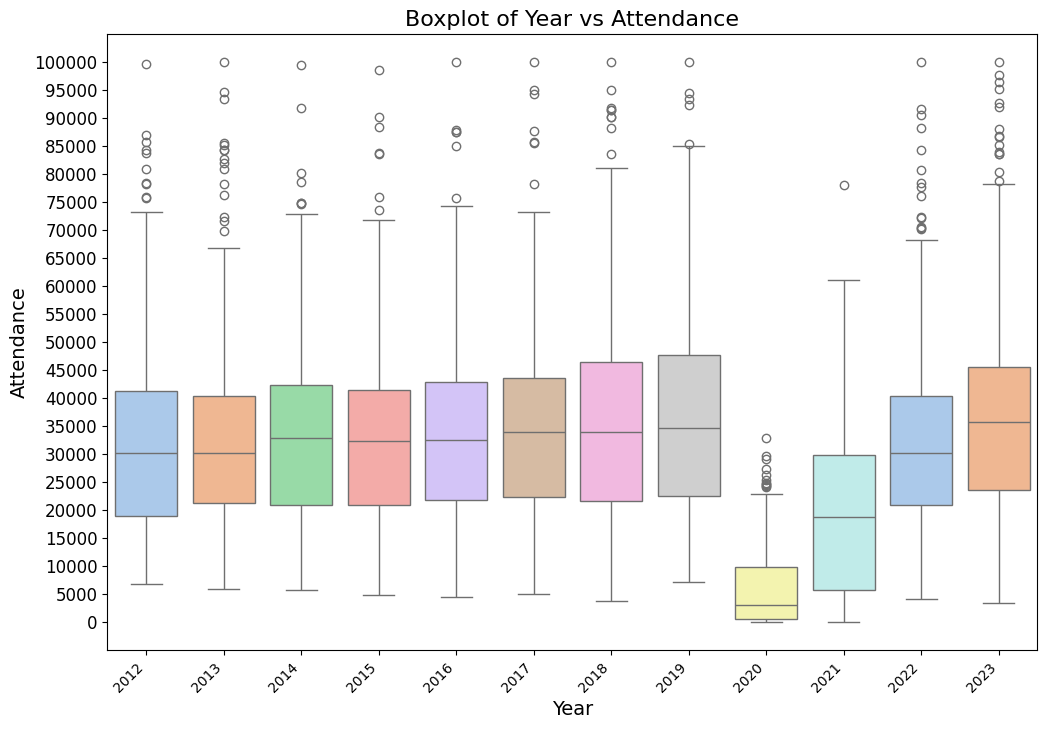

In [11]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Year'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Year vs Attendance', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()

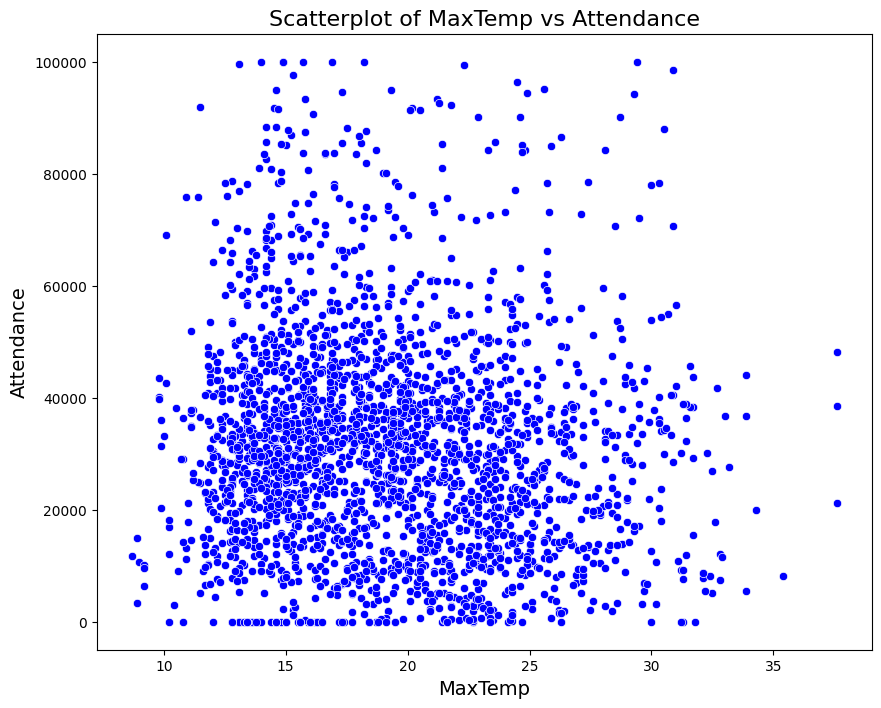

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = mainDF, x='MaxTemp', y='Attendance', color='blue')

plt.title('Scatterplot of MaxTemp vs Attendance', fontsize=16)
plt.xlabel('MaxTemp', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.show()

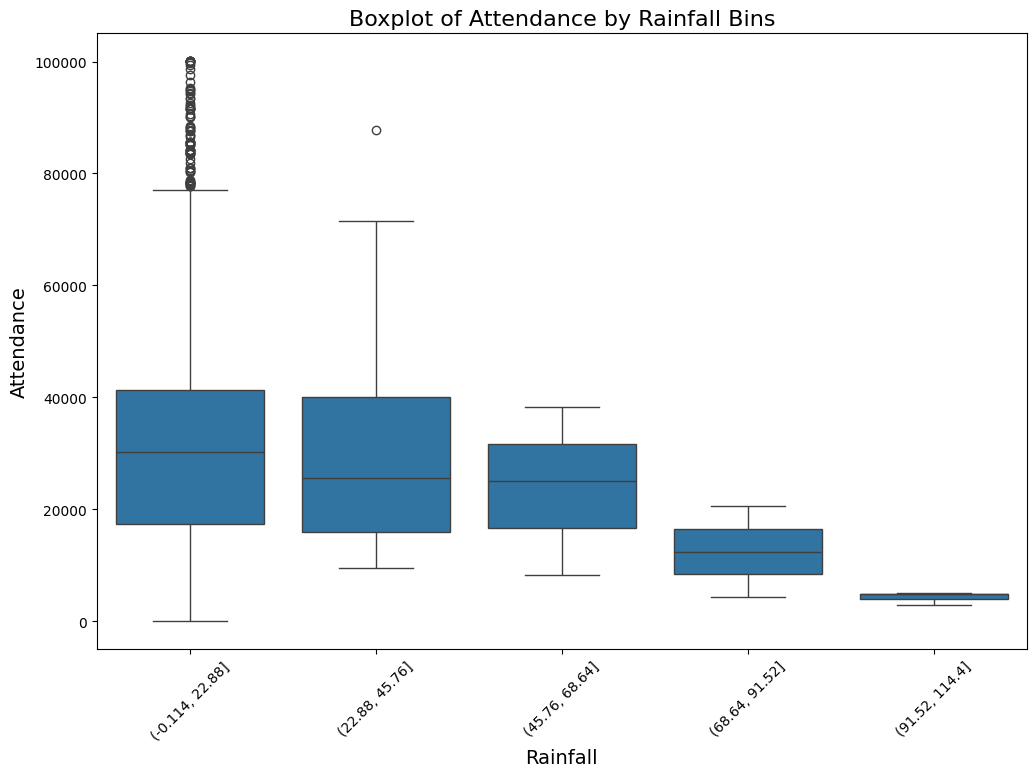

In [16]:
import numpy as np

# Create categorical bins for Rainfall
mainDF['Rainfall_Binned'] = pd.cut(mainDF['Rainfall'], bins=5)  # Adjust bins=5 as needed

plt.figure(figsize=(12, 8))
sns.boxplot(data=mainDF, x='Rainfall_Binned', y='Attendance')

plt.title('Boxplot of Attendance by Rainfall Bins', fontsize=16)
plt.xlabel('Rainfall', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\635418001.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['RainfallCategory'], y=mainDF['Attendance'], palette='pastel')


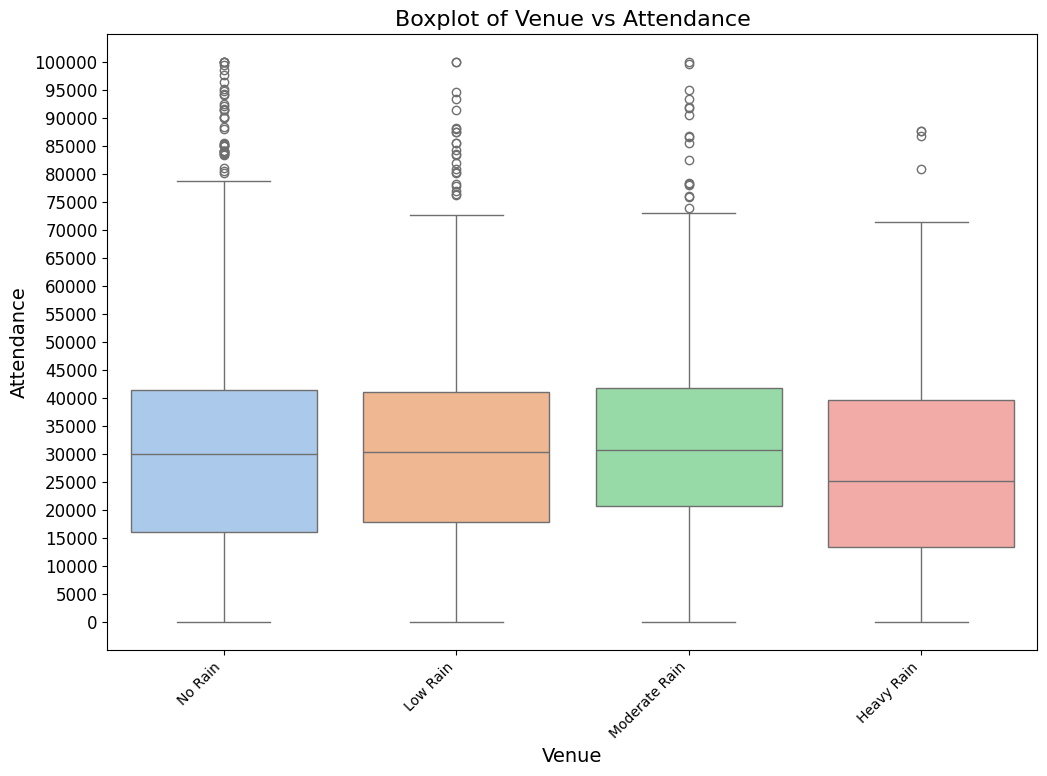

In [17]:
# Categorize Rainfall
def categorize_rainfall(rainfall):
    if rainfall == 0:
        return 'No Rain'
    elif rainfall > 0 and rainfall <= 2.5:
        return 'Low Rain'
    elif rainfall > 2.5 and rainfall <= 15:
        return 'Moderate Rain'
    else:
        return 'Heavy Rain'

mainDF['RainfallCategory'] = mainDF['Rainfall'].apply(categorize_rainfall)

# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['RainfallCategory'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Venue vs Attendance', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


In [18]:
venue_count = mainDF['Venue'].value_counts()
print(venue_count)

Venue
M.C.G.                560
Docklands             511
Adelaide Oval         232
Gabba                 162
Carrara               157
Subiaco               140
Perth Stadium         135
S.C.G.                120
Kardinia Park          95
Sydney Showground      93
York Park              48
Football Park          46
Bellerive Oval         36
Manuka Oval            33
Stadium Australia      19
Marrara Oval           16
Cazaly's Stadium       13
Eureka Stadium         12
Traeger Park            9
Wellington              3
Jiangwan Stadium        3
Norwood Oval            2
Blacktown               1
Riverway Stadium        1
Summit Sports Park      1
Name: count, dtype: int64


C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\1790040750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Round'], y=mainDF['Attendance'], palette='pastel')


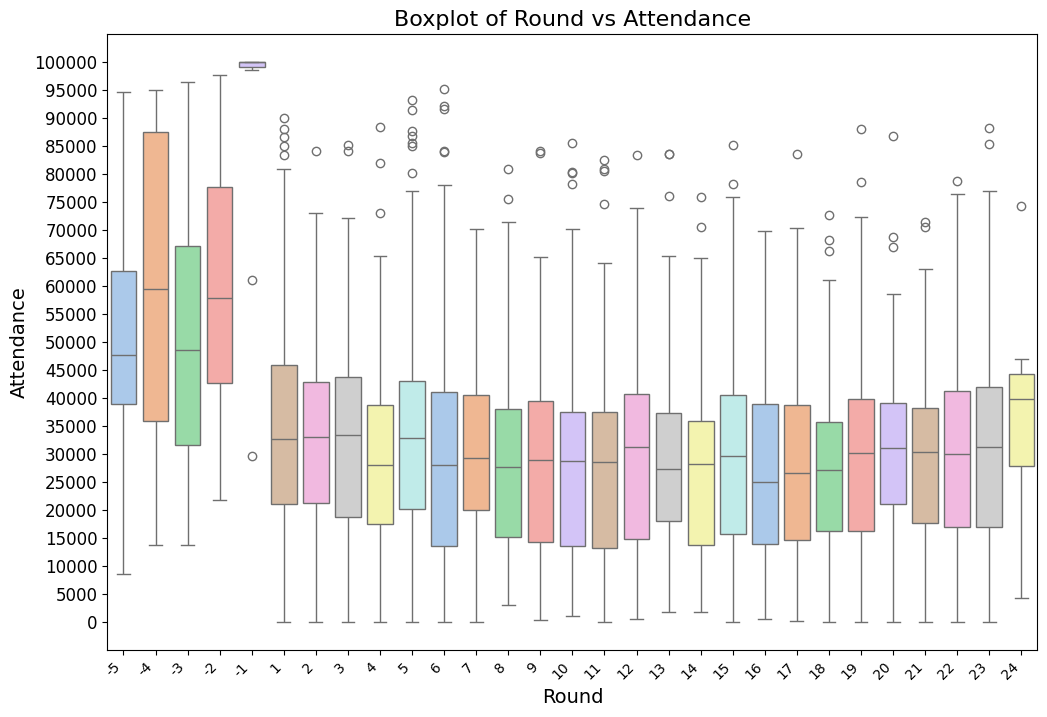

In [19]:
# Boxplot of Round vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Round'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Round vs Attendance', fontsize=16)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()

C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\2122358673.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=positive_rounds['Round'], y=positive_rounds['Attendance'], palette='pastel')
C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\2122358673.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=negative_rounds['Round'], y=negative_rounds['Attendance'], palette='pastel')


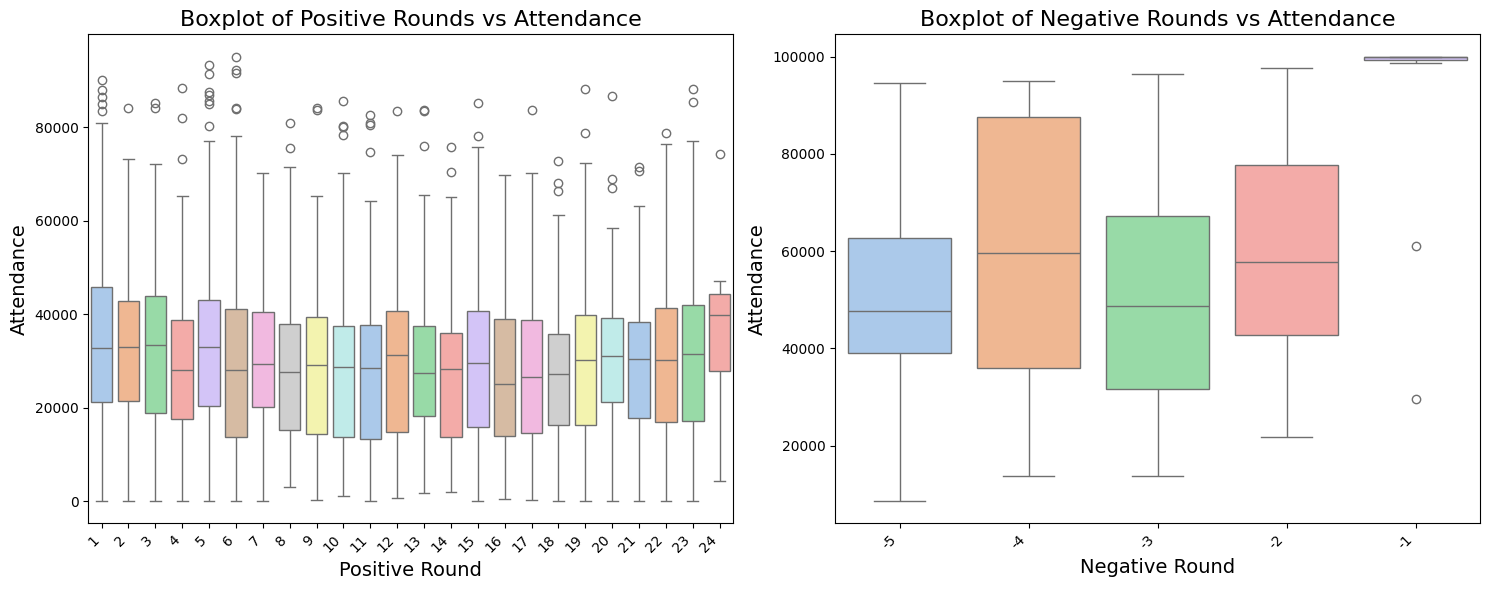

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into positive and negative rounds
positive_rounds = mainDF[mainDF['Round'] > 0]
negative_rounds = mainDF[mainDF['Round'] < 0]

# Create figure
plt.figure(figsize=(15, 6))

# Boxplot for Positive Rounds
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(x=positive_rounds['Round'], y=positive_rounds['Attendance'], palette='pastel')
plt.title('Boxplot of Positive Rounds vs Attendance', fontsize=16)
plt.xlabel('Positive Round', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Boxplot for Negative Rounds
plt.subplot(1, 2, 2)
sns.boxplot(x=negative_rounds['Round'], y=negative_rounds['Attendance'], palette='pastel')
plt.title('Boxplot of Negative Rounds vs Attendance', fontsize=16)
plt.xlabel('Negative Round', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_20708\4066589282.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, palette='pastel', width=0.6)


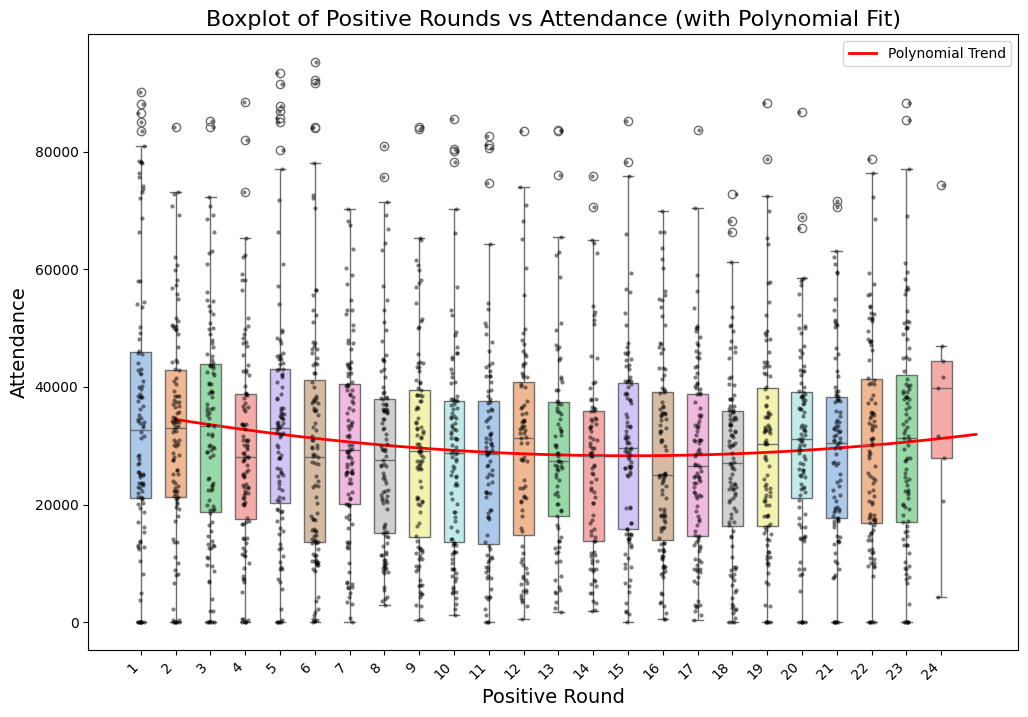

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Filter data: Only positive rounds
positive_rounds = mainDF[mainDF['Round'] > 0]

# Fit Polynomial Regression (Degree = 2 or 3 for curvature)
x = positive_rounds['Round']
y = positive_rounds['Attendance']

# Fit a 2nd-degree polynomial (quadratic)
poly_coeffs = np.polyfit(x, y, deg=2)  
poly_eq = np.poly1d(poly_coeffs)  

# Generate values for the fitted line
x_fit = np.linspace(x.min(), x.max(), 100)  
y_fit = poly_eq(x_fit)  

# Create figure
plt.figure(figsize=(12, 8))

# Boxplot
sns.boxplot(x=x, y=y, palette='pastel', width=0.6)

# Scatterplot overlay (actual points)
sns.stripplot(x=x, y=y, color='black', size=3, alpha=0.5, jitter=True)

# Polynomial Regression Line
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Polynomial Trend')

# Titles and labels
plt.title('Boxplot of Positive Rounds vs Attendance (with Polynomial Fit)', fontsize=16)
plt.xlabel('Positive Round', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend()

# Show plot
plt.show()


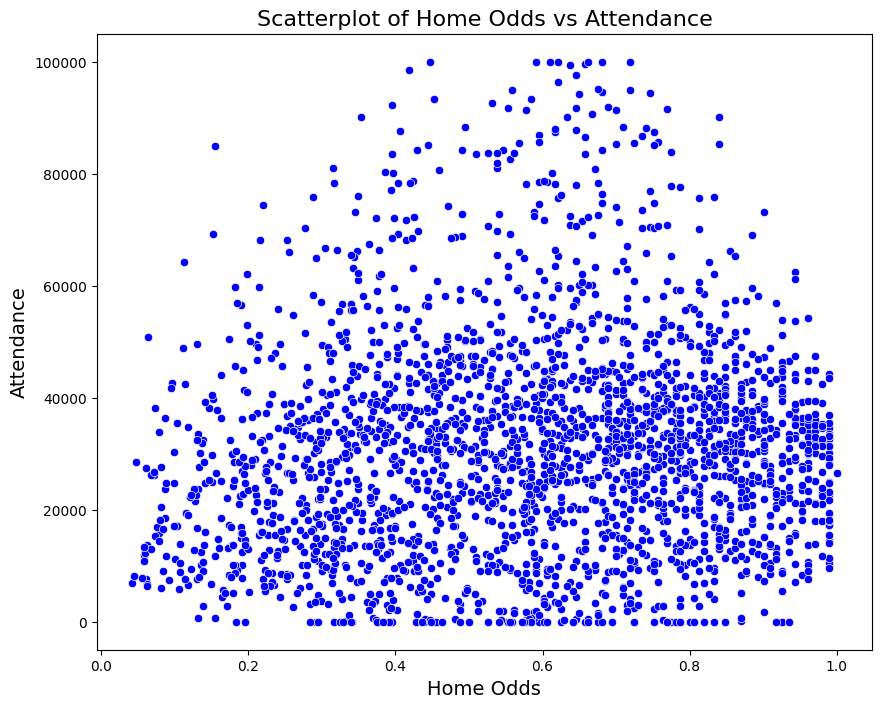

In [29]:
#plot attendance vs home odds
mainDF['Inv_Home_Odds'] = 1 / mainDF['Home Odds']
plt.figure(figsize=(10, 8))
sns.scatterplot(data = mainDF, x='Inv_Home_Odds', y='Attendance', color='blue')

plt.title('Scatterplot of Home Odds vs Attendance', fontsize=16)
plt.xlabel('Home Odds', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.show()

In [25]:
mainDF

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,homePosition,homePoints,homePercentage,awayPosition,awayPoints,awayPercentage,Home Odds,Away Odds,Rainfall_Binned,RainfallCategory
0,2012R0101,2012,1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,38203,...,18.0,0.0,37.0,1.0,4.0,270.3,13.78,1.02,"(-0.114, 22.88]",No Rain
1,2012R0102,2012,1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,78285,...,15.0,0.0,64.8,4.0,4.0,154.3,2.48,1.52,"(-0.114, 22.88]",No Rain
2,2012R0103,2012,1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,78466,...,6.0,4.0,119.1,13.0,0.0,83.9,1.65,2.19,"(-0.114, 22.88]",No Rain
3,2012R0104,2012,1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,33473,...,14.0,0.0,65.5,5.0,4.0,152.6,1.42,2.81,"(-0.114, 22.88]",Low Rain
4,2012R0105,2012,1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,12790,...,17.0,0.0,49.6,2.0,4.0,201.5,4.39,1.22,"(-0.114, 22.88]",No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2023SF01,2023,-3,2023-09-15,24.5,14.4,0.0,M.C.G.,7:50 PM,96412,...,NaN,NaN,NaN,NaN,NaN,NaN,1.61,2.21,"(-0.114, 22.88]",No Rain
2444,2023SF02,2023,-3,2023-09-16,24.0,7.6,0.0,Adelaide Oval,7:10 PM,45520,...,NaN,NaN,NaN,NaN,NaN,NaN,1.62,2.18,"(-0.114, 22.88]",No Rain
2445,2023PF01,2023,-2,2023-09-22,15.3,5.7,0.0,M.C.G.,7:50 PM,97665,...,NaN,NaN,NaN,NaN,NaN,NaN,1.55,2.34,"(-0.114, 22.88]",No Rain
2446,2023PF02,2023,-2,2023-09-23,24.1,14.2,0.0,Gabba,5:15 PM,36012,...,NaN,NaN,NaN,NaN,NaN,NaN,1.38,3.05,"(-0.114, 22.88]",No Rain
